# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

(846, 19) (846,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,31,88,42,77,151,58,8,140,47,18,142,165,293,158,64,10,11,198,205
1,562,113,53,93,197,62,11,216,31,24,165,221,688,196,72,6,25,188,199
2,592,79,43,72,141,62,8,153,44,19,144,175,344,174,78,0,8,182,188
3,58,107,53,103,221,66,11,209,32,24,163,222,653,212,66,0,1,191,201
4,328,93,43,88,170,66,9,150,45,19,147,164,334,143,65,2,17,196,206
5,760,107,45,92,197,62,10,188,35,22,148,202,526,159,64,12,20,195,203
6,737,105,51,93,160,51,7,217,30,24,165,240,703,208,81,9,25,188,188
7,399,87,42,64,150,64,10,133,50,18,141,157,265,159,67,7,0,193,201
8,504,97,46,94,209,67,10,195,34,22,147,224,573,194,70,0,14,188,197
9,115,95,47,88,162,64,11,159,43,20,157,176,371,185,71,12,13,189,198


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000
mean,419.879781,93.497268,44.706740,81.899818,168.846995,61.841530,8.535519,167.888889,41.029144,20.502732,147.790528,187.903461,434.428051,173.905282,72.264117,6.43898,12.759563,189.176685,195.874317
std,241.440477,7.959896,5.999359,15.175223,32.933386,8.064206,4.391963,32.098395,7.534051,2.500090,14.351741,30.324218,170.617098,32.009438,7.177202,4.90516,9.158007,6.161136,7.270871
min,1.000000,76.000000,33.000000,44.000000,104.000000,48.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,112.000000,59.000000,0.00000,0.000000,177.000000,181.000000
25%,211.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,147.000000,34.000000,19.000000,137.000000,168.000000,318.000000,149.000000,67.000000,2.00000,5.000000,184.000000,191.000000
50%,418.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,173.000000,72.000000,6.00000,11.000000,189.000000,197.000000
75%,635.000000,99.000000,49.000000,96.000000,195.000000,65.000000,10.000000,193.000000,46.000000,22.000000,159.000000,214.000000,570.000000,196.000000,75.000000,9.00000,19.000000,193.000000,201.000000
max,844.000000,117.000000,59.000000,110.000000,333.000000,138.000000,52.000000,262.000000,59.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.00000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

**Препроцессинг включает в себя заполнение пропусков (не требуется), преобразование нечисловых признаков (не требуется), масшабирование признаков, добавление признаков**

In [6]:
from sklearn import preprocessing

In [7]:
normalizer = preprocessing.StandardScaler()

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score
import scikitplot

In [9]:
model_pipeline = Pipeline(
    steps = (
        ('preproc', normalizer),
        ('lr', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))
    )
)
param_distr = {
    'lr__C': np.logspace(-5, 5, 11)
}

In [70]:
clf = RandomizedSearchCV(model_pipeline, param_distr, scoring=['f1_weighted', 'accuracy'],
                         cv=5, n_jobs=-1, refit='accuracy')
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)[['param_lr__C',
                               'mean_test_accuracy',
                               'rank_test_accuracy',
                               'mean_test_f1_weighted',
                               'rank_test_f1_weighted',
                              ]].sort_values('rank_test_accuracy')

,param_lr__C,mean_test_accuracy,rank_test_accuracy,mean_test_f1_weighted,rank_test_f1_weighted
3,100,0.785054,1,0.781387,1
8,10000,0.785054,1,0.781387,1
9,1000,0.785054,1,0.781387,1
0,10,0.781418,4,0.777577,4
5,1,0.775880,5,0.771074,5
6,0.1,0.744954,6,0.734511,6
2,0.01,0.681201,7,0.651946,7
4,0.001,0.555680,8,0.498954,8
7,0.0001,0.380651,9,0.262993,9
1,1e-05,0.265938,10,0.111745,10


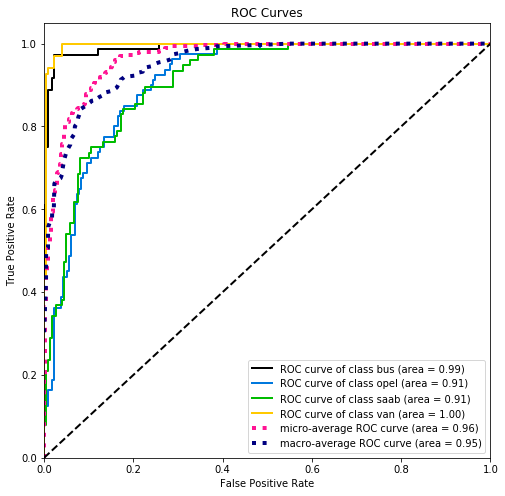

In [50]:
scikitplot.metrics.plot_roc(y_test, clf.predict_proba(X_test), figsize=(8, 8))

**Вывод**

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explained variance plot. 

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
X_norm = normalizer.fit_transform(X_train)

In [14]:
pca = PCA(n_components=19)
pca.fit(X_norm)
loss = pca.explained_variance_
for i in range(18, 0, -1):
    loss[i - 1] += loss[i]
loss /= loss[0]

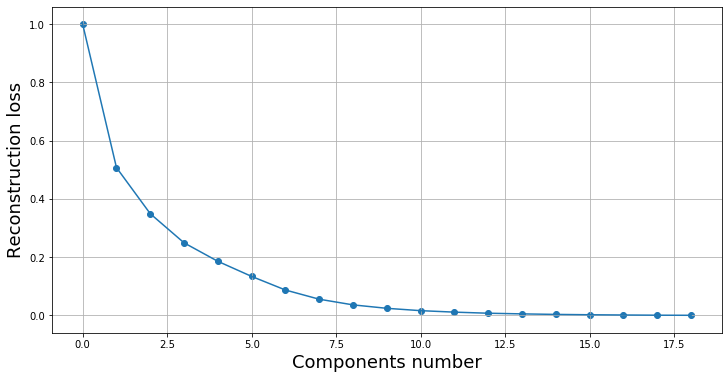

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(np.arange(0, 19, 1), loss)
plt.xlabel('Components number', fontsize=18)
plt.ylabel('Reconstruction loss', fontsize=18)
plt.plot(np.arange(0, 19, 1), loss)
plt.grid(':')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [55]:
pca = PCA(n_components=13)

**Почему?**

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [56]:
pca_pipeline = Pipeline(
    steps = (
        ('scale', normalizer),
        ('pca', pca),
        ('lr', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))
    )
)
param_distr = {
    'lr__C': np.logspace(-5, 5, 11)
}

In [69]:
pca_clf = RandomizedSearchCV(pca_pipeline, param_distr, scoring=['f1_weighted', 'accuracy'],
                             cv=10, n_jobs=-1, refit='accuracy')
pca_clf.fit(X_train, y_train)
pd.DataFrame(pca_clf.cv_results_)[['param_lr__C',
                               'mean_test_accuracy',
                               'rank_test_accuracy',
                               'mean_test_f1_weighted',
                               'rank_test_f1_weighted',
                              ]].sort_values('rank_test_accuracy')

,param_lr__C,mean_test_accuracy,rank_test_accuracy,mean_test_f1_weighted,rank_test_f1_weighted
1,10,0.750404,1,0.747415,1
8,1,0.744983,2,0.740211,2
2,100,0.743131,3,0.739269,3
3,100000,0.743131,3,0.739269,3
4,10000,0.743131,3,0.739269,3
5,1000,0.743131,3,0.739269,3
9,0.1,0.734074,7,0.723312,7
7,0.01,0.681178,8,0.648144,8
0,0.001,0.548384,9,0.485934,9
6,0.0001,0.382492,10,0.266837,10


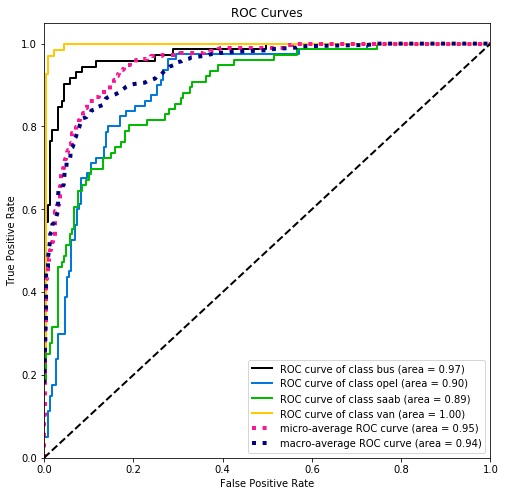

In [19]:
scikitplot.metrics.plot_roc(y_test, pca_clf.predict_proba(X_test), figsize=(8, 8))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of N algorithms varying N from 2 to 100 (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


To build a __Bagging__ ensebmle you might generate 50 subsets of `train` data (of the same size as the original dataset) using bootstrap procedure. Then you train logistic regression/decision tree with optimal hyperparameters you estimated before on each subset. Finally, you average the models predictions.

*Hint: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE